In [1]:
import numpy as np
import pandas as pd

In [2]:
populasyon = np.random.randint(0,2000,10000)

In [3]:
populasyon

array([1955,  398, 1154, ..., 1506,  609,  376])

In [35]:
populasyon.mean()

1001.8868

In [4]:
np.random.seed(115)

In [5]:
orneklem1=np.random.choice(populasyon, 100)

In [6]:
orneklem1

array([1650, 1618,  594, 1351, 1696, 1329, 1504,  486,   30,  918,  592,
        684,  225, 1787, 1037,  181, 1884,  177, 1595,  143, 1376, 1542,
        134, 1938, 1044,  965,  449, 1937,  137, 1196,  738,  480, 1876,
        762,  923, 1143, 1952, 1578,   33, 1258,  314, 1858, 1659,  278,
       1023, 1870, 1479,   15, 1191, 1686,  221, 1126, 1207,   35,  160,
       1970,  445,  672, 1004,  536, 1730,  349, 1342, 1539,  732, 1987,
       1617,   50, 1962, 1457, 1058,  358, 1622, 1562, 1025,  495,  677,
        937, 1883,  728,  911,  693, 1144,  943,  959, 1033, 1423,  519,
        106, 1985, 1620, 1614, 1785, 1186,  150, 1165,  144,    9,  652,
       1397])

In [7]:
import scipy.stats as stats

In [8]:
orneklem_1 = orneklem1.copy()
orneklem_1 = pd.DataFrame(orneklem_1)

In [16]:
orneklem_1.describe().T

,count,mean,std,min,25%,50%,75%,max
0,100.0,1022.39,614.630215,9.0,492.75,1035.0,1582.25,1987.0


In [11]:
stats.describe(orneklem1)

DescribeResult(nobs=100, minmax=(9, 1987), mean=1022.39, variance=377770.30090909085, skewness=-0.09482493920495454, kurtosis=-1.2337068467719452)

# H0 : Bilinmeyen ana kütle ortalaması(mü), 1000'e eşittir.
# H1: Bilinmeyen ana kütle ortalaması(mü), 1000'den farklıdır. 

<AxesSubplot:ylabel='Frequency'>

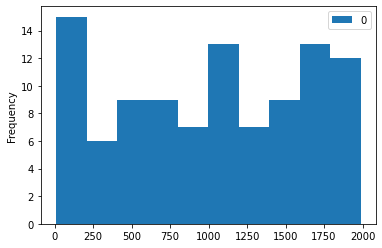

In [15]:
#Normallik Varsayımı Kontrolü
#Histogram
orneklem_1.plot.hist()

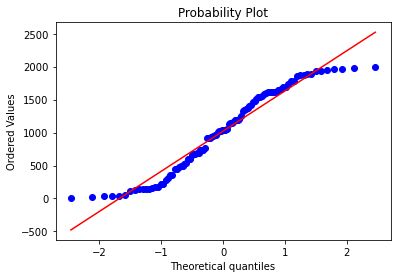

In [18]:
#qqplot
import pylab
stats.probplot(orneklem1, dist="norm", plot=pylab)
pylab.show()

In [29]:
#Shapiro-Wilks Test

#H0: Örnek dağılımı ile teorik dağılım arasında(Normal Dağılım) istatistiksel olarak anlamlı bir fark yoktur.
#H1: Örnek dağılımı ile teorik dağılım arasında istatistiksel olarak anlamlı bir fark vardır.

from scipy.stats import shapiro
shapiro(orneklem1)
print("T Hesap İstatistiği: ", shapiro(orneklem1)[0])
print("p-value: ", shapiro(orneklem1)[1])
#ShapiroResult(statistic=0.9422145485877991, pvalue=0.0002638059377204627), p-value<0.05 olduğundan H0 ret edildi. 
#Tek Örneklem T Testi'nin var sayımı olan normallik, sağlanamadığından t-testine devam edilmemelidir.

T Hesap İstatistiği:  0.9422145485877991
p-value:  0.0002638059377204627


In [30]:
#Aynı dağılım içinden yeni bir örneklem seçsek aynı sonucu verir mi? 
orneklem2 = np.random.choice(populasyon, 100)

In [37]:
orneklem2

array([ 574,  503, 1567, 1955,  909, 1592,  883,   69, 1568,  953, 1337,
       1831, 1406,  102,  395,  177, 1813,  503,  753,  691, 1492,  332,
        420,  681,  617,  799,  795,  561,  371, 1422, 1421,  623, 1118,
       1045,  427,  745, 1856,  519,   74,  188, 1928, 1429, 1735,  718,
        317,  272, 1470,  380, 1241, 1757, 1653,  500,  915,  643, 1968,
       1886, 1362,  994, 1208,  150,  187, 1361, 1870,  115,  787,  937,
       1221,  968, 1046,  773,  950,  112, 1800,  845,  743,  533, 1083,
       1518, 1881, 1150, 1028,  940, 1160,  138, 1253,  944,  824,  446,
        515,  574,  710, 1961, 1634,  869, 1922,  747, 1316, 1442, 1219,
        550])

In [33]:
stats.describe(orneklem2)

DescribeResult(nobs=100, minmax=(69, 1968), mean=976.85, variance=297915.88636363635, skewness=0.2012784570019343, kurtosis=-0.9973421019071269)

In [36]:
shapiro(orneklem2)

ShapiroResult(statistic=0.9593887329101562, pvalue=0.0036381075624376535)

In [72]:
#Nonparametric One-Sample T Test
from statsmodels.stats.descriptivestats import sign_test
sign_test(orneklem2)
#p-value<0.05, so h0 hypothesis will be rejected.

(50.0, 1.5777218104420236e-30)

# Normal Dağılıma Sahip Bir Populasyonun Testi

In [50]:
#Normal dağılıma sahip bir popülasyon oluşturalım:

#import random
import numpy as np

# Set mean and standard deviation for normal distribution
mean = 1000
std_dev = 40

# Generate 10000 normally distributed random numbers
population = np.random.normal(mean, std_dev, 10000)

# Convert any values less than 1 to 1 and any values greater than 2000 to 2000
population = np.clip(population, 1, 2000)

# Round each value to the nearest integer
population = np.round(population).astype(int)


# H0: μ = 1018
# H1: μ !=1018

In [59]:
population.mean()

1000.2365

<AxesSubplot:ylabel='Frequency'>

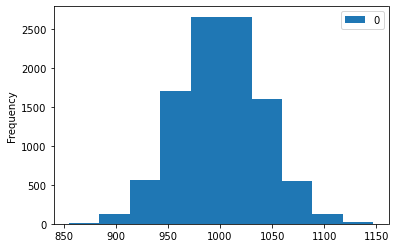

In [51]:
pd.DataFrame(population).plot.hist()

In [53]:
# H0: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir fark yoktur.
# H1: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir fark vardır.
sample = np.random.choice(population, 100)
shapiro(sample)

ShapiroResult(statistic=0.9912230372428894, pvalue=0.7625174522399902)

In [ ]:
# p-value > 0.05 olduğundan H0 ret edilemez. Normallik var sayımı sağlanmıştır.

In [70]:
#One-Sample T Test
stats.ttest_1samp(sample, popmean=1018)

Ttest_1sampResult(statistic=-2.1918641600790845, pvalue=0.030733325348632465)

In [ ]:
# One Sample T Test sonucunda da %95 güvenle H0 ret edilemeyerek popülasyon ortalamasının 1018'den farklı olmadığı kanıtlanmıştır. 

# İş Uygulaması: Dönüşüm Oranı Testi

In [ ]:
#Hipotezlerin Kurulması 

H0: p = 0.125 (#Ürün satın almasına ilişkin dönüşüm oranı 0.125'tir.)
H1: p!= 0.125

In [1]:
from statsmodels.stats.proportion import proportions_ztest

In [2]:
countSuccess=40
nobs=500
value=0.125

In [3]:
proportions_ztest(countSuccess, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

# A/B TESTİ (BAĞIMSIZ İKİ ÖRNEKLEM T TESTİ)

H0: μ1 = μ2 (A, eski sistemin gösterilerine göre insanlar ürün aldıktan belirli bir süre sonra ortaya çıkan gelirlerin ortalamasıyla, B, yani yeni sistemin gösterilerine göre ürünler alındığında ortaya çıkan gelirlerin ortalaması birbirine eşittir.)
H1: μ1 != μ2 

In [ ]:
# GELEBİLECEK VERİ TİPİ 1

In [5]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

In [20]:
A_B = pd.concat([A,B], axis=1)
A_B.columns = ["A", "B"]
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [22]:
# GELEBİLECEK VERİ TİPİ 2

In [21]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

In [32]:
#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A,GRUP_A], axis=1)

In [41]:
#B ve B'nin grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis=1)

In [49]:
# Tüm Veri
AB = pd.concat([A,B])
AB.columns = ["gelir", "GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


In [50]:
import seaborn as sns

<AxesSubplot:xlabel='GRUP', ylabel='gelir'>

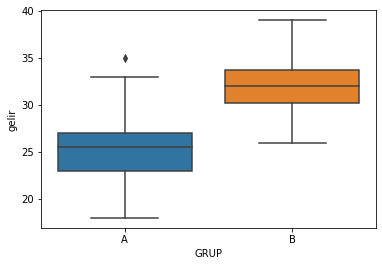

In [51]:
sns.boxplot(x="GRUP", y="gelir", data=AB)
#B grubunun daha yukarıda olduğu gözleniyor. Bu şans eseri mi oluştu yoksa istatistiki olarak böyle mi henüz bilmiyoruz. 